In [216]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [217]:
df = pd.read_csv('food_toxin_matrix.csv')

In [218]:
df.rename(columns={'Unnamed: 0' : 'species'}, inplace=True)

In [219]:
df.set_index('species', inplace=True)

In [220]:
df.sum(0).head(), df.sum(1).head()

(grape          4
 pumpkin        1
 popsicles      1
 sauces        21
 bruschetta    15
 dtype: int64, species
 bacillus cereus        1281
 bacillus unknown          5
 salmonella                5
 salmonella enterica    3870
 enteropathogenic         44
 dtype: int64)

In [221]:
# target_organisms = ['norovirus', 'salmonella', 'clostridium', 'staphylococcus', 'bacillus', 'escherichia', 'scombroid',
#                     'shiga', 'campylobacter', 'ciguatoxin', 'jejuni', 'vibrio', 'shigella', 'listeria',
#                     'botulinum', 'hepatitis', 'shellfish', 'cyclospora', 'cryptosporidium']

In [222]:
df.drop(['unspecified','other','unknown'], axis=1, inplace=True)

In [223]:
df.drop(['unknown'], inplace=True)

In [224]:
target_foods = df.max().sort_values(ascending=False)[:25].index

In [225]:
target_foods

Index(['salad', 'chicken', 'fish', 'sandwich', 'beef', 'tuna', 'mahi', 'pork',
       'milk', 'rice', 'ground', 'eggs', 'salads', 'oysters', 'turkey',
       'multiple', 'unpasteurized', 'beans', 'raw', 'ice', 'fried', 'foods',
       'roast', 'fruit', 'lettuce-based'],
      dtype='object')

In [226]:
target_species = df.max(axis=1).sort_values(ascending=False)[:25].index

In [227]:
# target_species = df.max(axis=1).sort_values(ascending=False)[:12].index

In [228]:
df = df.loc[target_species,target_foods]

In [229]:
df = df.sort_values('species')

In [230]:
df = df.reindex(sorted(df.columns), axis=1)

In [231]:
df

,beans,beef,chicken,eggs,fish,foods,fried,fruit,ground,ice,...,pork,raw,rice,roast,salad,salads,sandwich,tuna,turkey,unpasteurized
species,,,,,,,,,,,,,,,,,,,,,
bacillus cereus,38,36,82,0,3,15,64,0,7,5,...,19,0,130,6,17,6,12,2,12,0
bacterium,2,6,10,0,0,6,2,0,2,0,...,1,3,5,0,4,0,2,1,0,0
campylobacter jejuni,1,11,41,0,3,0,2,2,3,1,...,1,28,2,1,16,1,3,1,6,80
campylobacter unknown,0,3,10,0,0,0,1,1,0,2,...,2,10,0,0,2,2,5,1,2,18
chemical or toxin,2,4,6,1,17,3,1,1,2,2,...,1,0,2,0,5,0,1,2,0,0
ciguatoxin,0,0,0,1,232,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clostridium botulinum,1,0,0,3,9,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,0
clostridium perfringens,79,190,159,0,3,17,12,0,31,3,...,70,0,48,57,18,6,15,1,65,0
escherichia coli,4,133,12,0,1,4,0,6,110,4,...,5,10,2,3,37,9,12,0,1,31


In [232]:
all_foods = df.sum(axis=1)

In [233]:
all_diseases = df.sum()

In [234]:
df_disease_given_food = df / all_diseases

In [235]:
df_disease_given_food.head()

,beans,beef,chicken,eggs,fish,foods,fried,fruit,ground,ice,...,pork,raw,rice,roast,salad,salads,sandwich,tuna,turkey,unpasteurized
species,,,,,,,,,,,,,,,,,,,,,
bacillus cereus,0.197917,0.047745,0.094798,0.000000,0.005357,0.083333,0.402516,0.000000,0.018421,0.027933,...,0.059561,0.000000,0.442177,0.058824,0.019630,0.027523,0.026846,0.007843,0.045802,0.000000
bacterium,0.010417,0.007958,0.011561,0.000000,0.000000,0.033333,0.012579,0.000000,0.005263,0.000000,...,0.003135,0.011628,0.017007,0.000000,0.004619,0.000000,0.004474,0.003922,0.000000,0.000000
campylobacter jejuni,0.005208,0.014589,0.047399,0.000000,0.005357,0.000000,0.012579,0.014184,0.007895,0.005587,...,0.003135,0.108527,0.006803,0.009804,0.018476,0.004587,0.006711,0.003922,0.022901,0.421053
campylobacter unknown,0.000000,0.003979,0.011561,0.000000,0.000000,0.000000,0.006289,0.007092,0.000000,0.011173,...,0.006270,0.038760,0.000000,0.000000,0.002309,0.009174,0.011186,0.003922,0.007634,0.094737
chemical or toxin,0.010417,0.005305,0.006936,0.007937,0.030357,0.016667,0.006289,0.007092,0.005263,0.011173,...,0.003135,0.000000,0.006803,0.000000,0.005774,0.000000,0.002237,0.007843,0.000000,0.000000


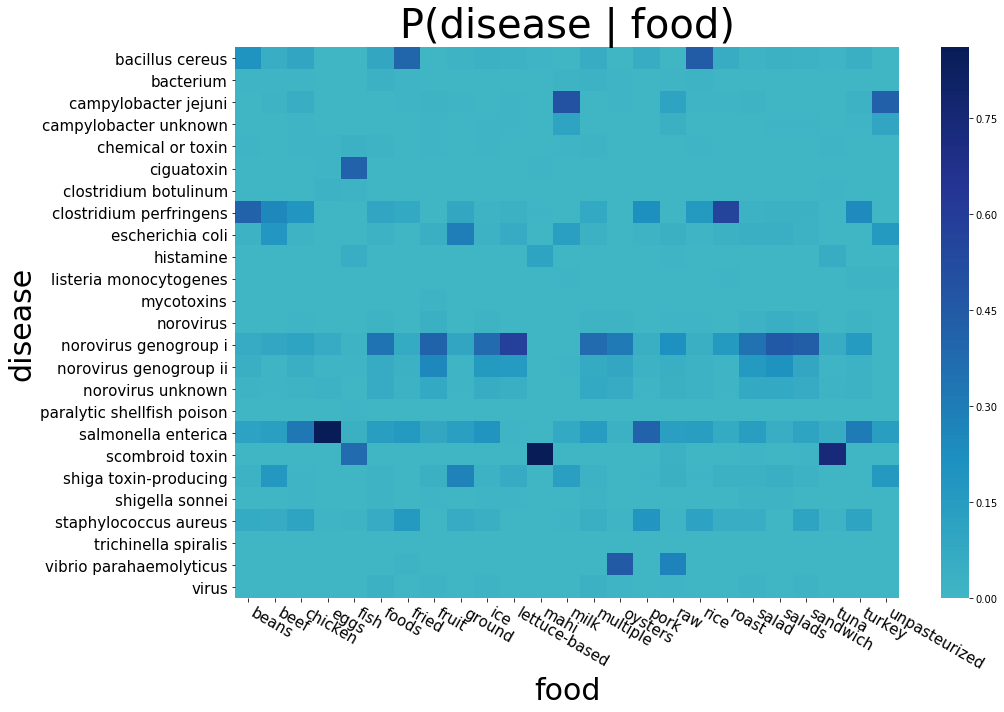

In [246]:
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(df_disease_given_food, center=0, cmap="YlGnBu")
ax.set_ylabel('disease', size=30)
ax.set_xlabel('food', size=30)
ax.set_title('P(disease | food)', size=40)
plt.xticks(fontsize=15, rotation=-30, ha='left')
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('figures/disease_given_food');

In [237]:
df = df.T

In [238]:
all_foods = df.sum()

In [239]:
all_diseases = df.sum(axis=1)

In [240]:
# e.g. P(salad | norovirus)

In [241]:
df_food_given_disease = df / all_foods

In [242]:
df_food_given_disease.dropna(axis=1, inplace=True)

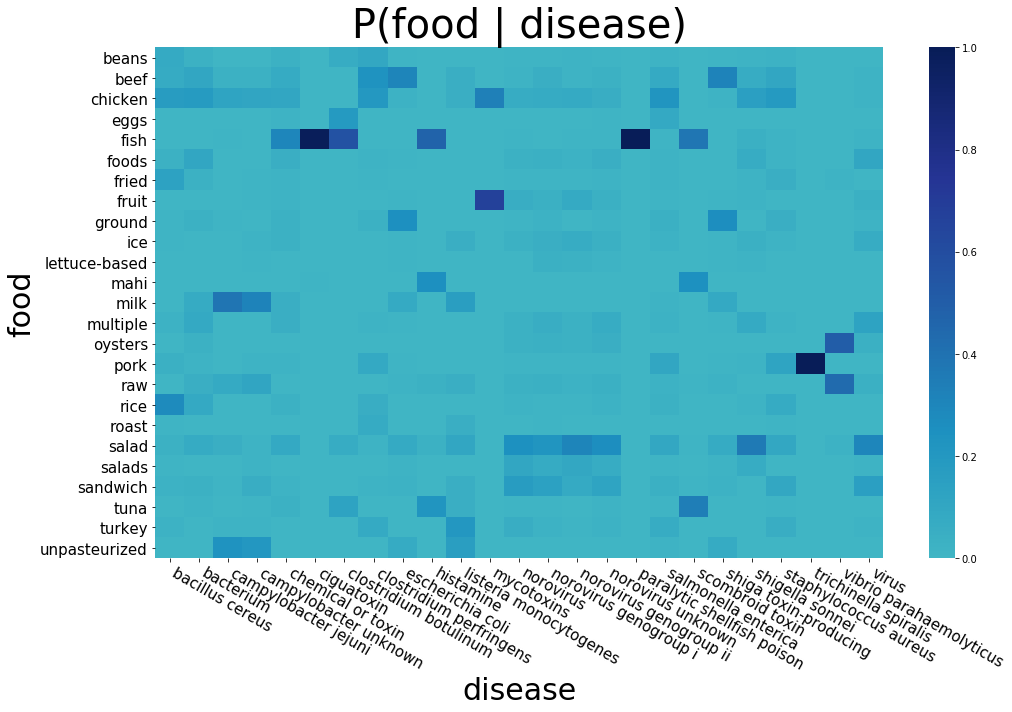

In [243]:
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(df_food_given_disease, center=0, cmap="YlGnBu")
ax.set_ylabel('food', size=30)
ax.set_xlabel('disease', size=30)
ax.set_title('P(food | disease)', size=40)
plt.xticks(fontsize=15, rotation=-30, ha='left')
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('figures/food_given_disease');